In [2]:
#%%
import datetime
import pandas as pd
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [12]:
dateparse = lambda x: datetime.datetime.strptime(x, '%d%b%Y:%H:%M:%S')
series= pd.read_csv('AIL.csv',parse_dates=True,squeeze=True,index_col=0,header=0)
series.head()

Date_Begin_Local
2010-01-01 00:00:00    8307.0
2010-01-01 01:00:00    8186.0
2010-01-01 02:00:00    8075.0
2010-01-01 03:00:00    8013.0
2010-01-01 04:00:00    7982.0
Name: ACTUAL_AIL, dtype: float64

# Data Visualisation
## Line Plot
Below is a line plot of Alberta Internal Load time series from 2010 to november 2021.

Text(0, 0.5, 'AIL (MWh)')

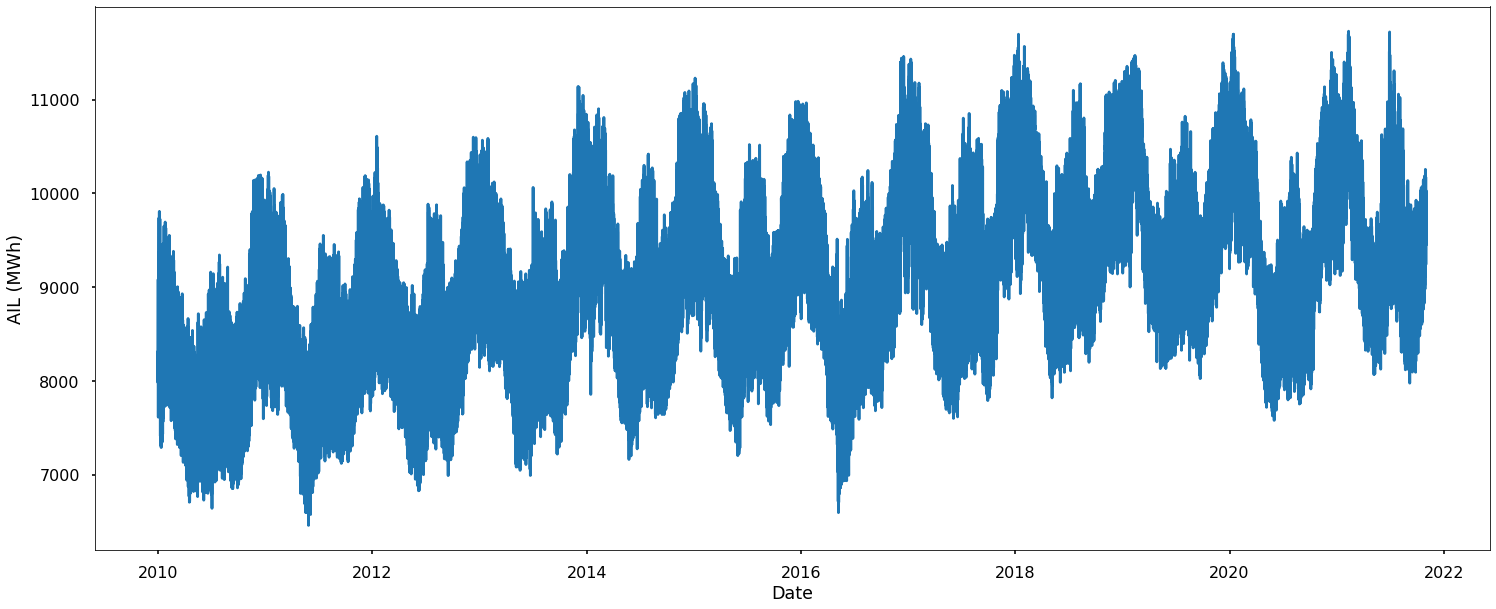

In [13]:
plt.style.use( 'seaborn-poster')
plt.rcParams["figure.figsize"] = (25,10)
ax0=sns.lineplot(x=series.index, y=series.values)
ax0.set_xlabel('Date')
ax0.set_ylabel('AIL (MWh)')
# for scattedr plot :
# series.plot(style='b.')

# Histogram and density plot
Distribution of the observations are important visualization in time series. Some forecasting models assume normal distribution of the observations. It is useful to check and see what type of distribution our time series have. From the plot below we can see that our data has a distribution close to normal distribution. 

Text(0, 0.5, 'Count')

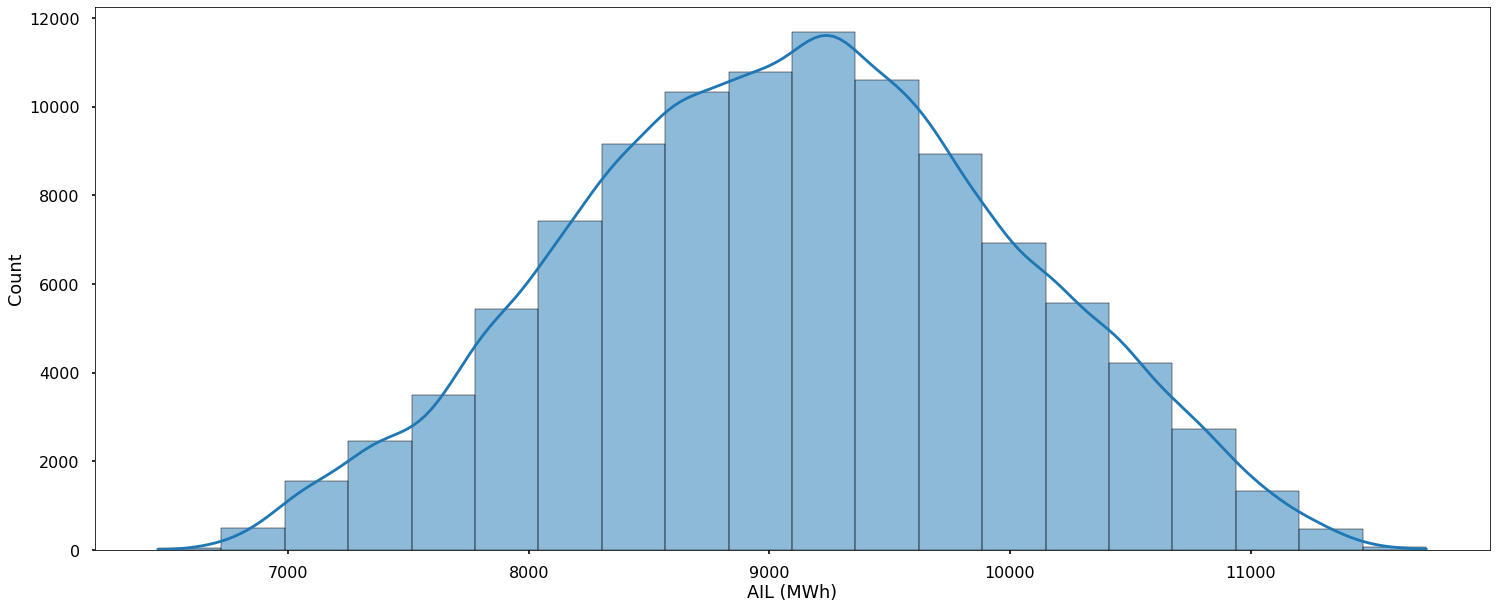

In [14]:
ax1=sns.histplot(series, kde=True, bins=20)
ax1.set_xlabel('AIL (MWh)')
ax1.set_ylabel('Count')

# Box and Whisker Plots
This plot draws a box around the 25th and 75th precentiles of the data that captures the middle 50% of the observations.The dots outside the whiskers show the outliers. Here we plot the boxes once groped by year and once grouped monthly.

Text(0.5, 1.0, ' Box plot by year')

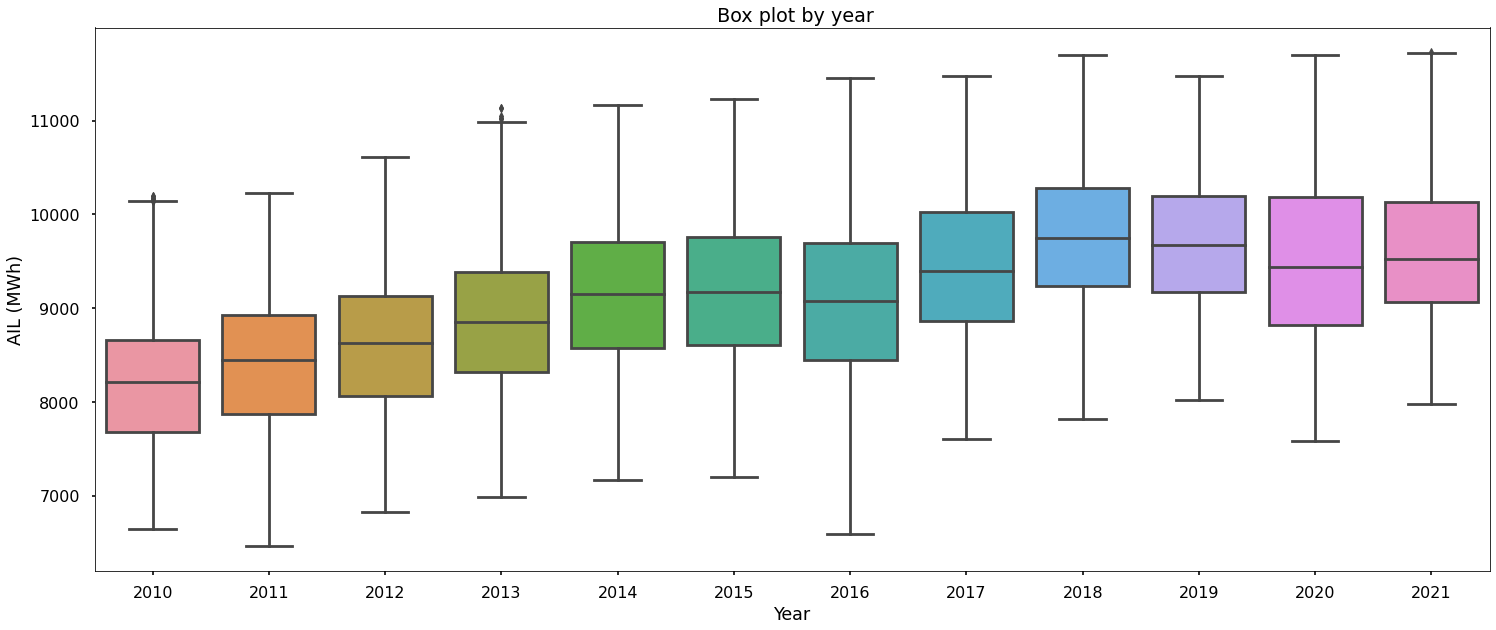

In [15]:
ax2=sns.boxplot(x=series.index.year, y=series)
ax2.set_ylabel('AIL (MWh)')
ax2.set_xlabel('Year')
plt.title(' Box plot by year')

Text(0.5, 1.0, 'Monthly Box plot')

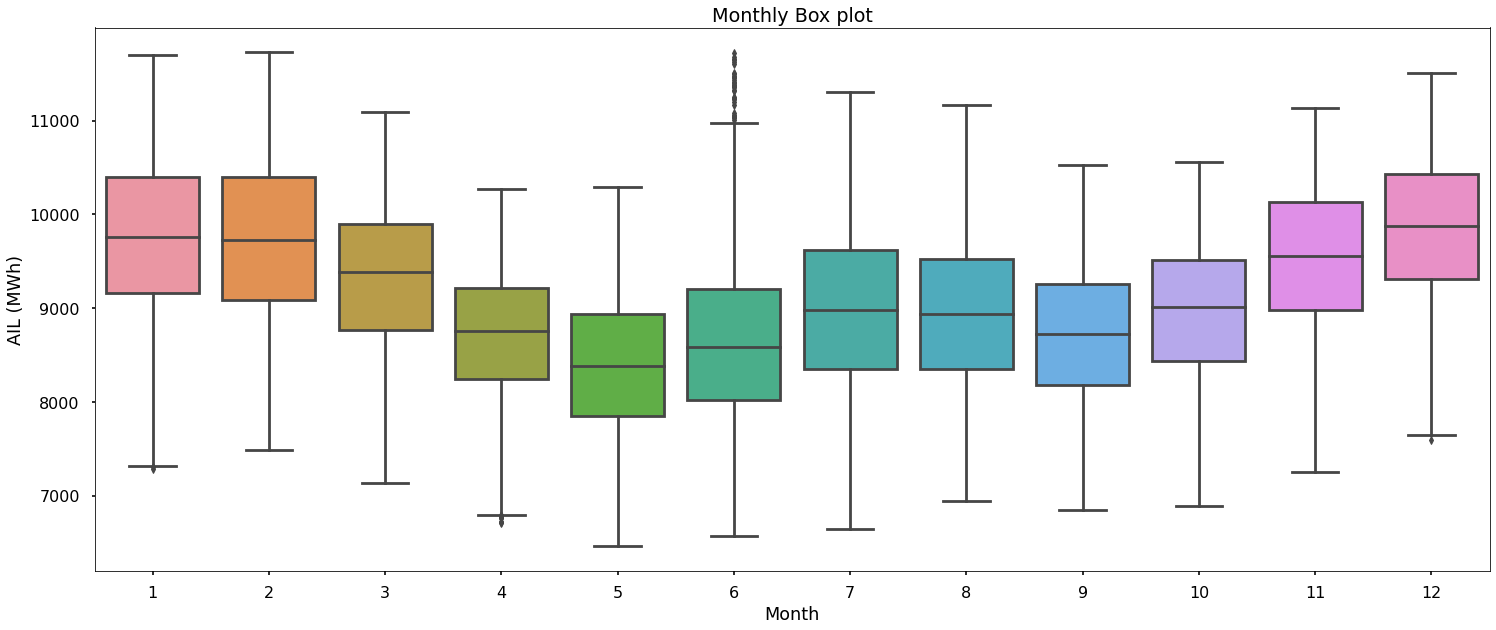

In [16]:
ax3=sns.boxplot(x=series.index.month, y=series)
ax3.set_ylabel('AIL (MWh)')
ax3.set_xlabel('Month')
plt.title('Monthly Box plot')


Text(0.5, 1.0, 'Hourly Box plot')

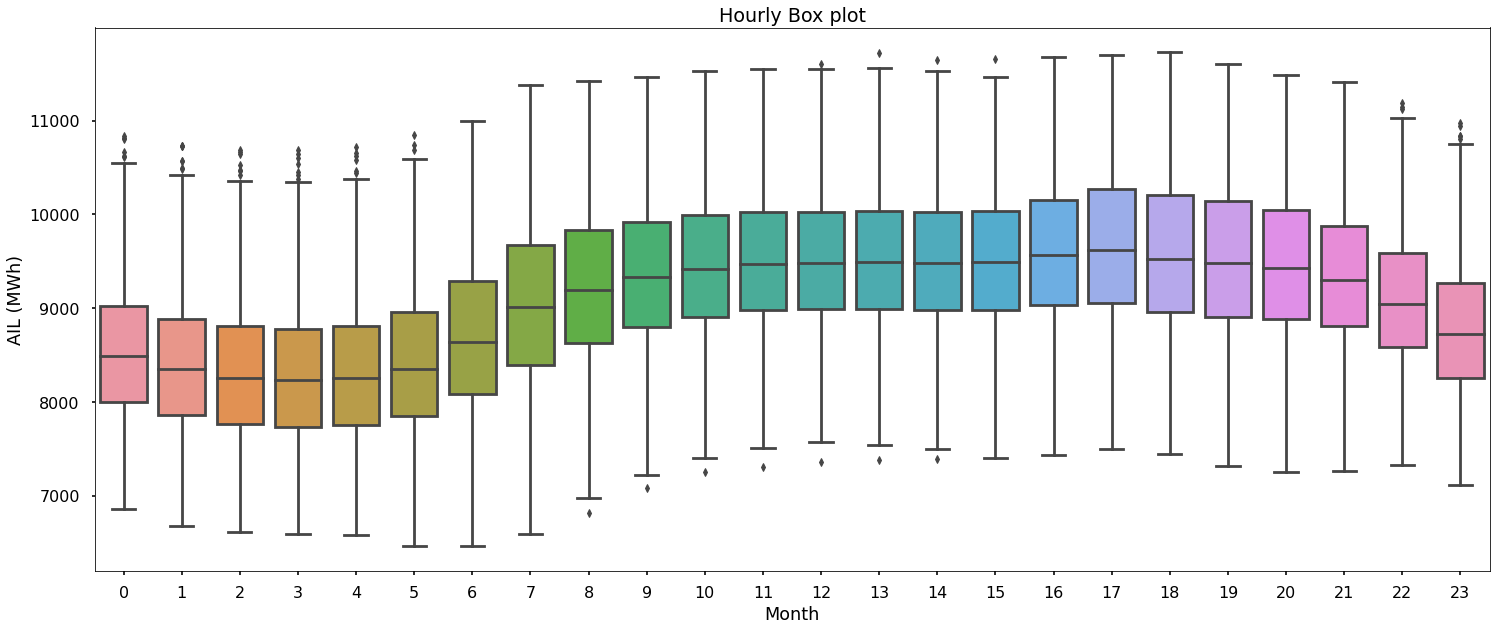

In [17]:
ax4=sns.boxplot(x=series.index.hour, y=series)
ax4.set_ylabel('AIL (MWh)')
ax4.set_xlabel('Month')
plt.title('Hourly Box plot')

# Lag Scatter plot
In time series modeling we assume there is a relationship beteen an observation and its previous observation. A useful type of plot in time series analysis is a scatter plot of the observations and their lag observations. The cluster could have positive or negative correlation relationship. 

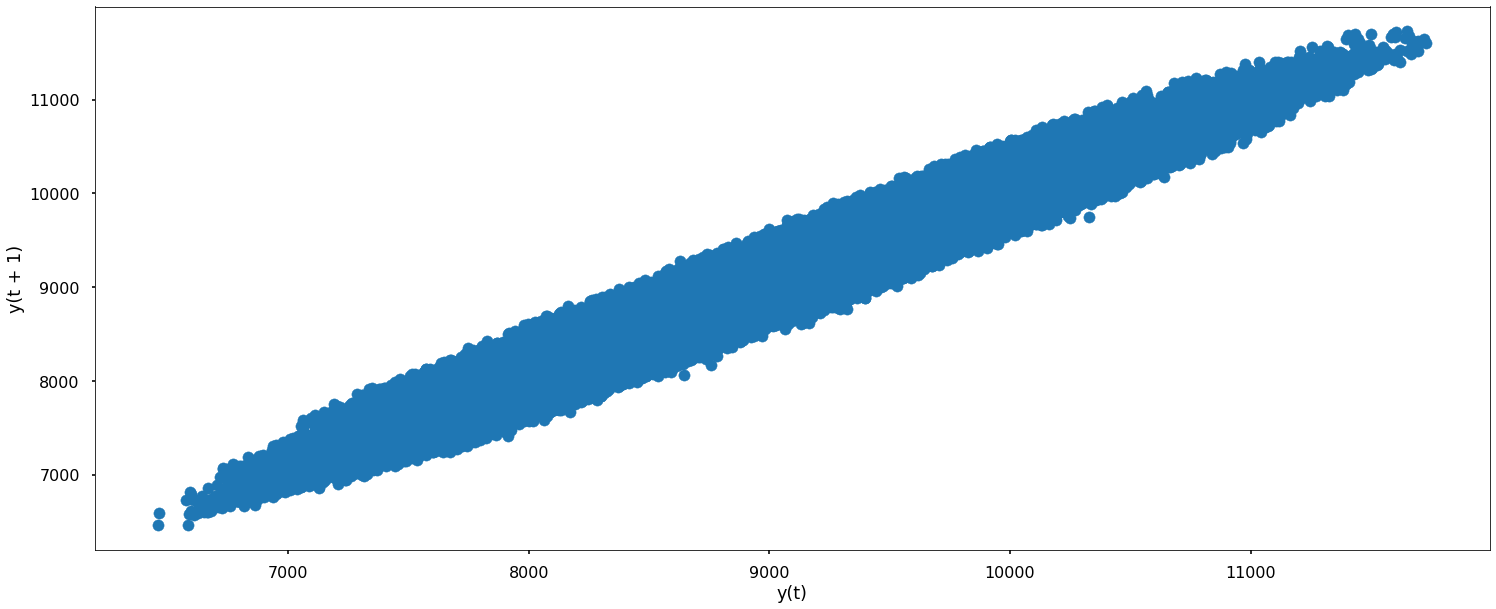

In [18]:
ax5=pd.plotting.lag_plot(series)

As we can see this data shows positive correlation relationship for lag 1 observations.

# Autocorrelation Plots
The strenght and type of relationship between the observations can be quantified using autocorrelation. The autocorrelation results in numbers between -1 and one. -1 and 1 show strong negative and positive correlation between the observations.The following graph shows this plot for one month of data from our series. The sine waves are strong sign of seasonality.

Text(0.5, 1.0, 'Autocorrelation plot for AIL for 6-2019')

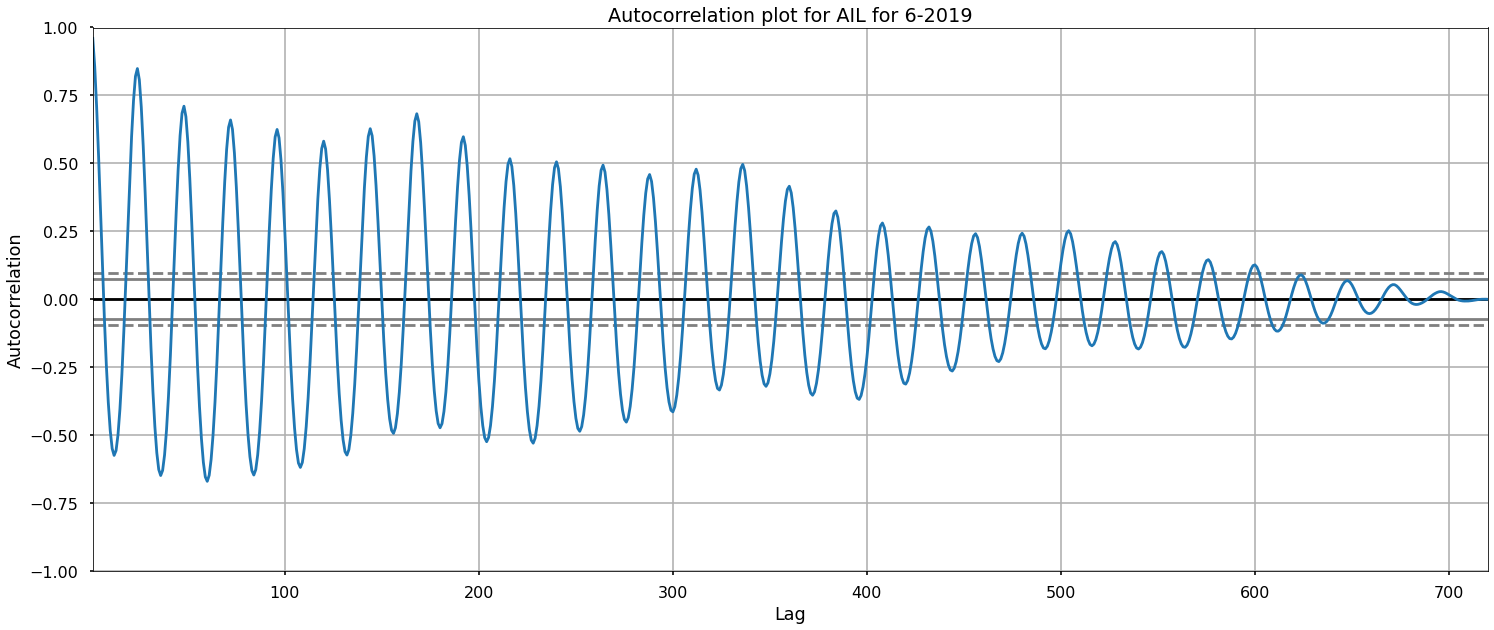

In [19]:
year=2019
month=6
series_sample_month=series.loc[(series.index.year==year) & (series.index.month==month) ]
ax6=pd.plotting.autocorrelation_plot(series_sample_month)
plt.title("Autocorrelation plot for AIL for {}-{}".format(month,year))

And below is the same graph for one year data: 

Text(0.5, 1.0, 'Autocorrelation plot for AIL for 2019')

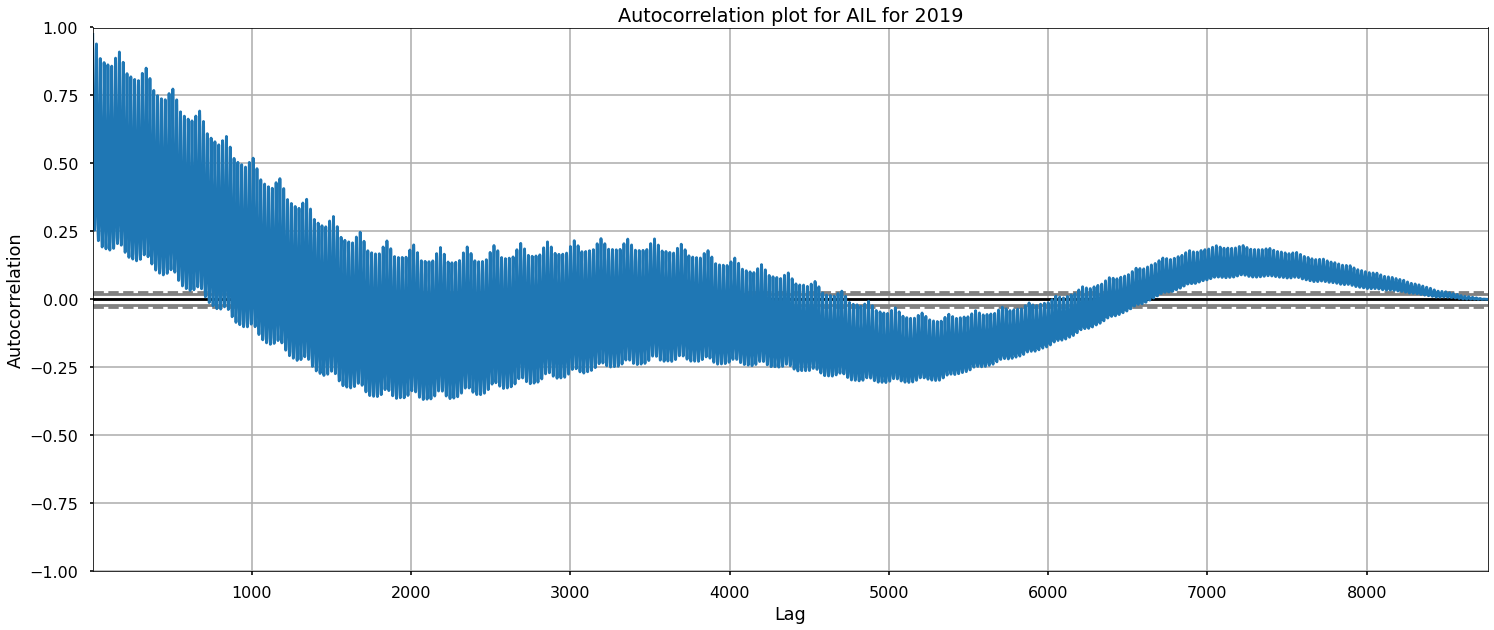

In [20]:
year=2019
series_sample_year=series.loc[series.index.year==year ]
ax7=pd.plotting.autocorrelation_plot(series_sample_year)
plt.title("Autocorrelation plot for AIL for {}".format(year))

In [65]:
df= pd.read_csv('AIL.csv',parse_dates=True)
df.columns=['ds','y']
df.drop_duplicates(subset=['ds'],inplace=True)
# lets filter the data prior to 2015
df=df.loc[df.ds>= '2015-01-01'].reset_index(drop=True)

df.head()

ds       y
0  2015-01-01 00:00:00  9210.0
1  2015-01-01 01:00:00  9045.0
2  2015-01-01 02:00:00  8839.0
3  2015-01-01 03:00:00  8742.0
4  2015-01-01 04:00:00  8699.0

In [56]:
from prophet import Prophet
m = Prophet()
m.fit(df)

Initial log joint probability = -151.411


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        187560     0.0248667         52825           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        188772    0.00332109       12963.2      0.4207           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        189126    0.00534682       2862.63           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        189279     0.0398851       37238.3           1           1      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        189479    0.00111166       6356.33           1           1      578   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

In [5]:
#from prophet.plot import plot_plotly, plot_components_plotly
#import plotly.offline as py




In [60]:

# create forecast
future = m.make_future_dataframe(periods=356)
forecast = m.predict(future)


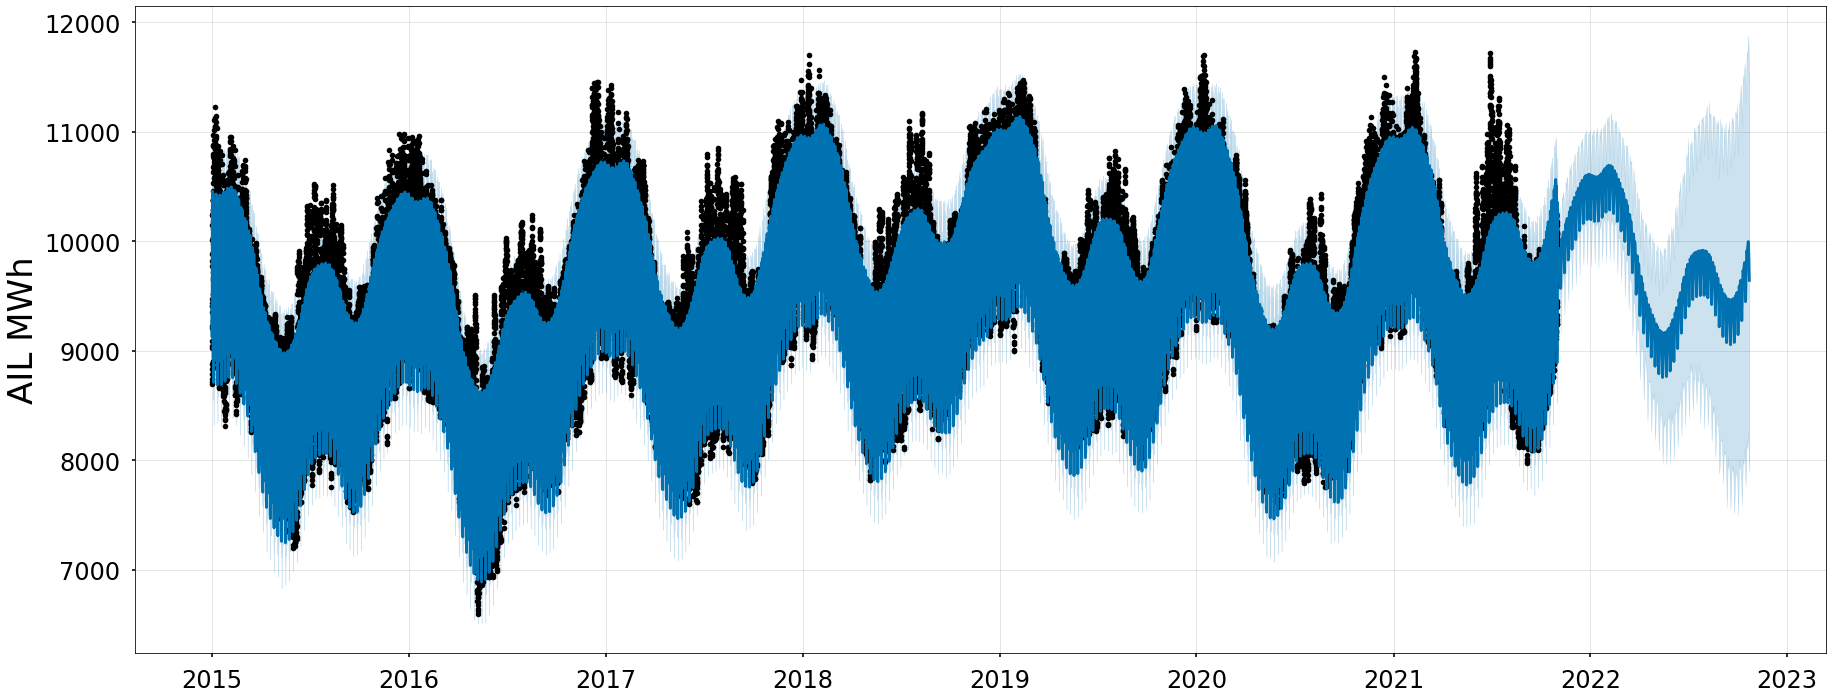

In [61]:
fig = m.plot(forecast,figsize=(25, 10))
ax = fig.gca()
#ax.set_title("Title", size=34)
ax.set_xlabel("", size=34)
ax.set_ylabel("AIL MWh", size=34)
ax.tick_params(axis="x", labelsize=24)
ax.tick_params(axis="y", labelsize=24)



In [67]:
from neuralprophet import NeuralProphet

m = NeuralProphet()
metrics = m.fit(df, freq="H")


INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO:NP.config:Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 65
INFO:NP.config:Auto-set epochs to 65


  0%|          | 0/338 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.81E-02, min: 1.44E+00
INFO:NP.utils_torch:lr-range-test results: steep: 2.81E-02, min: 1.44E+00


  0%|          | 0/338 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.64E-02, min: 1.53E+00
INFO:NP.utils_torch:lr-range-test results: steep: 2.64E-02, min: 1.53E+00


  0%|          | 0/338 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.98E-02, min: 1.27E+00
INFO:NP.utils_torch:lr-range-test results: steep: 2.98E-02, min: 1.27E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 2.81E-02
INFO:NP.forecaster:lr-range-test selected learning rate: 2.81E-02
Epoch[65/65]: 100%|██████████| 65/65 [01:16<00:00,  1.17s/it, SmoothL1Loss=0.00262, MAE=241, RMSE=304, RegLoss=0]    


In [69]:
# create forecast
df_future = m.make_future_dataframe(df, periods=365)
forecast = m.predict(df_future)


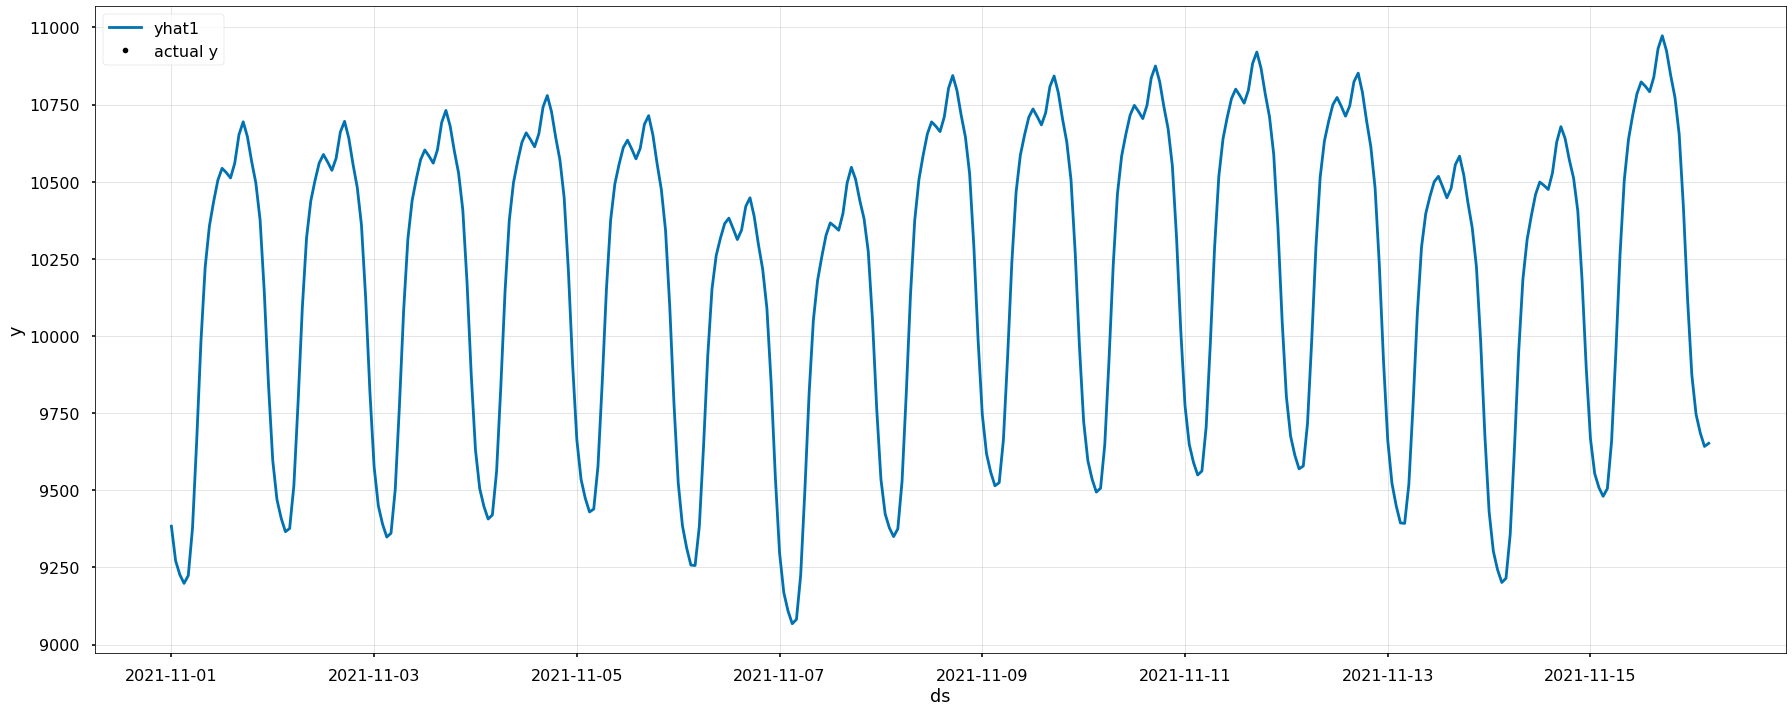

In [83]:

# create plots
fig_forecast = m.plot(forecast,figsize=(25, 10))


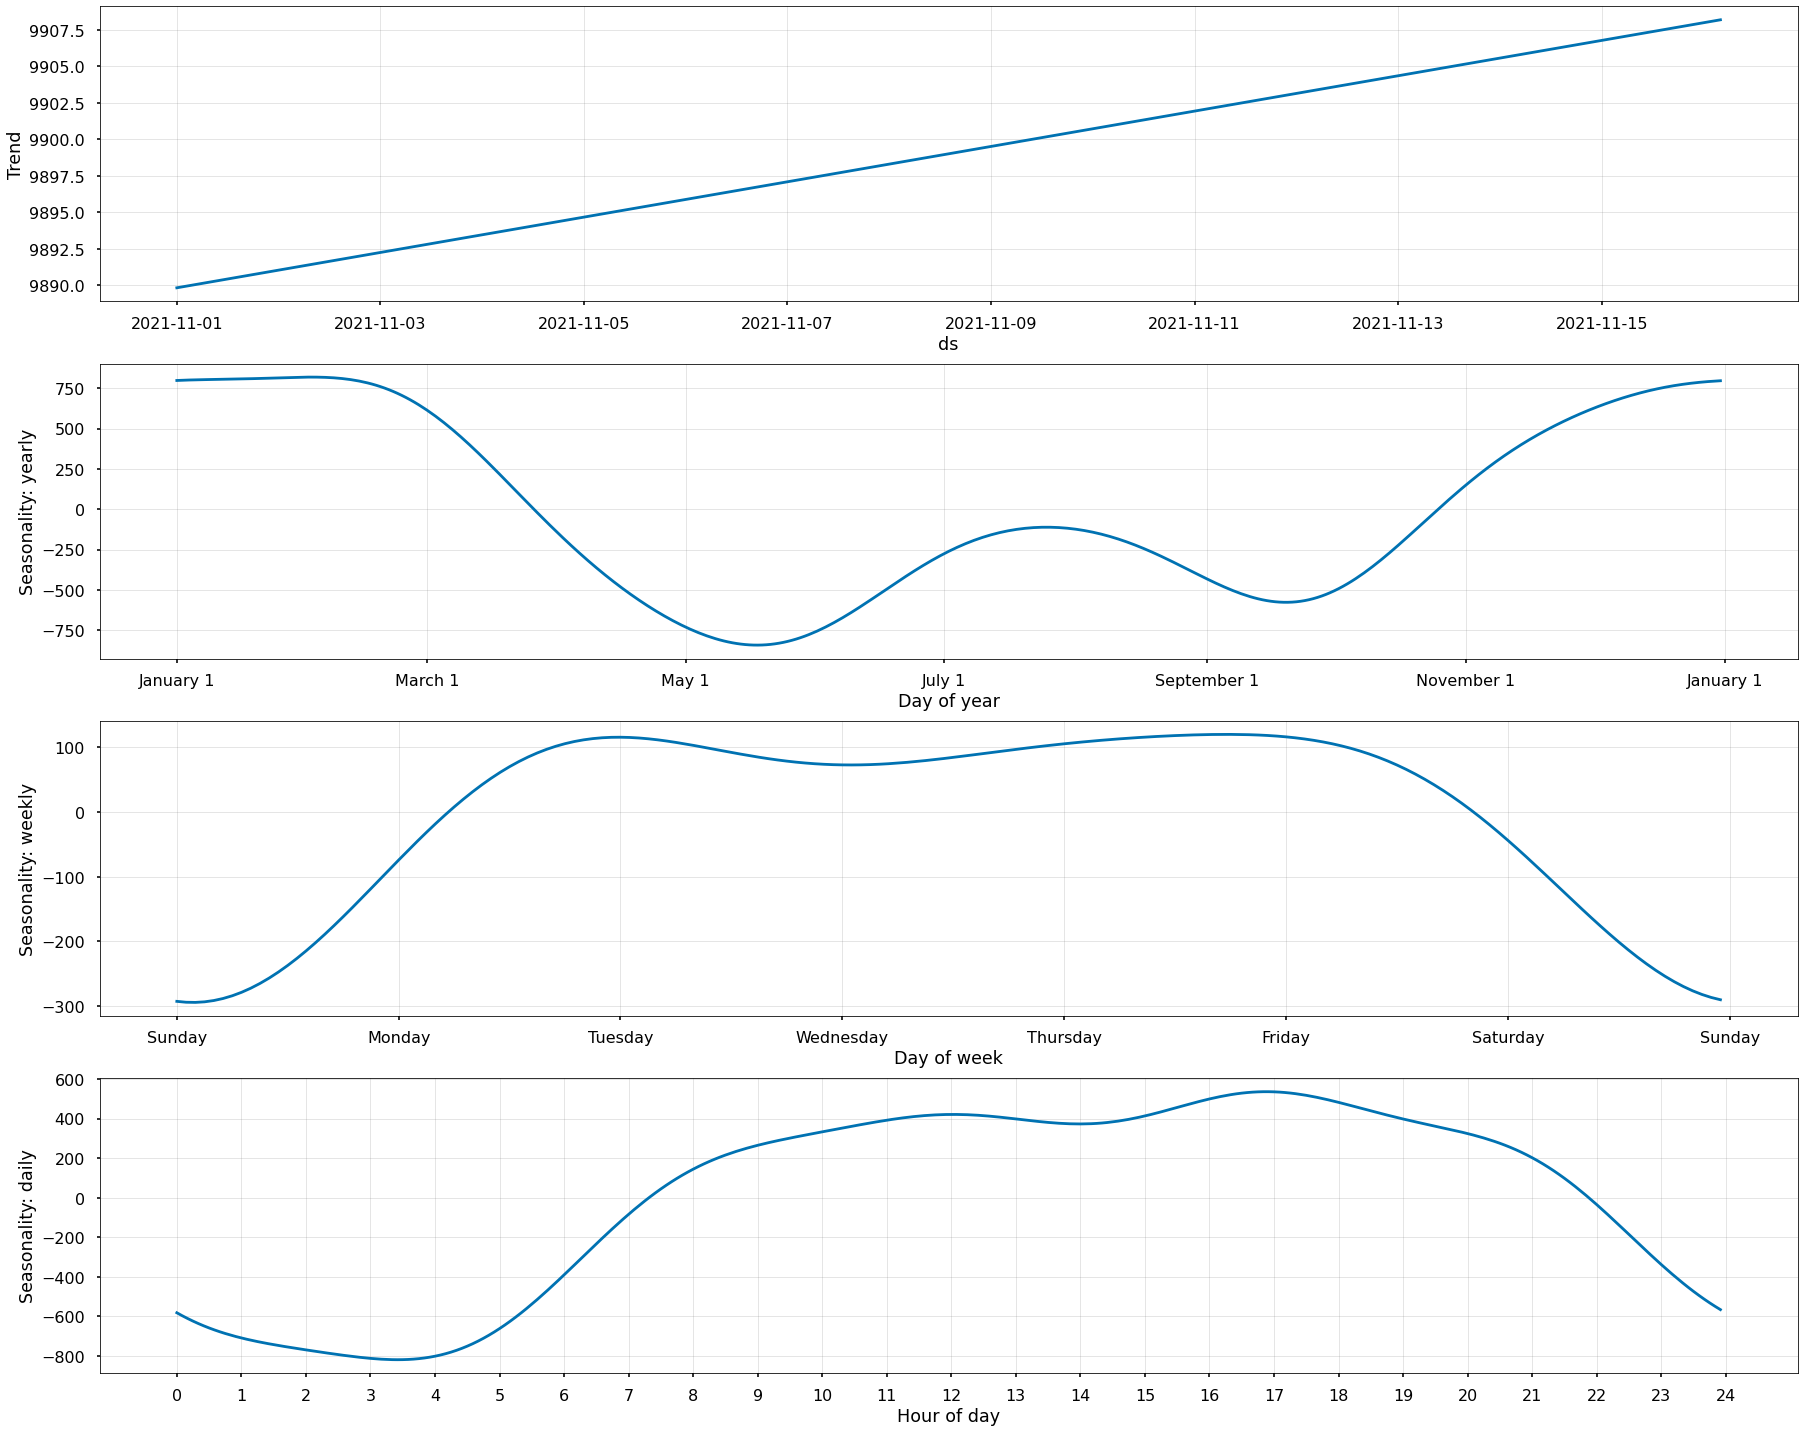

In [75]:
fig_components = m.plot_components(forecast,figsize=(25, 20))



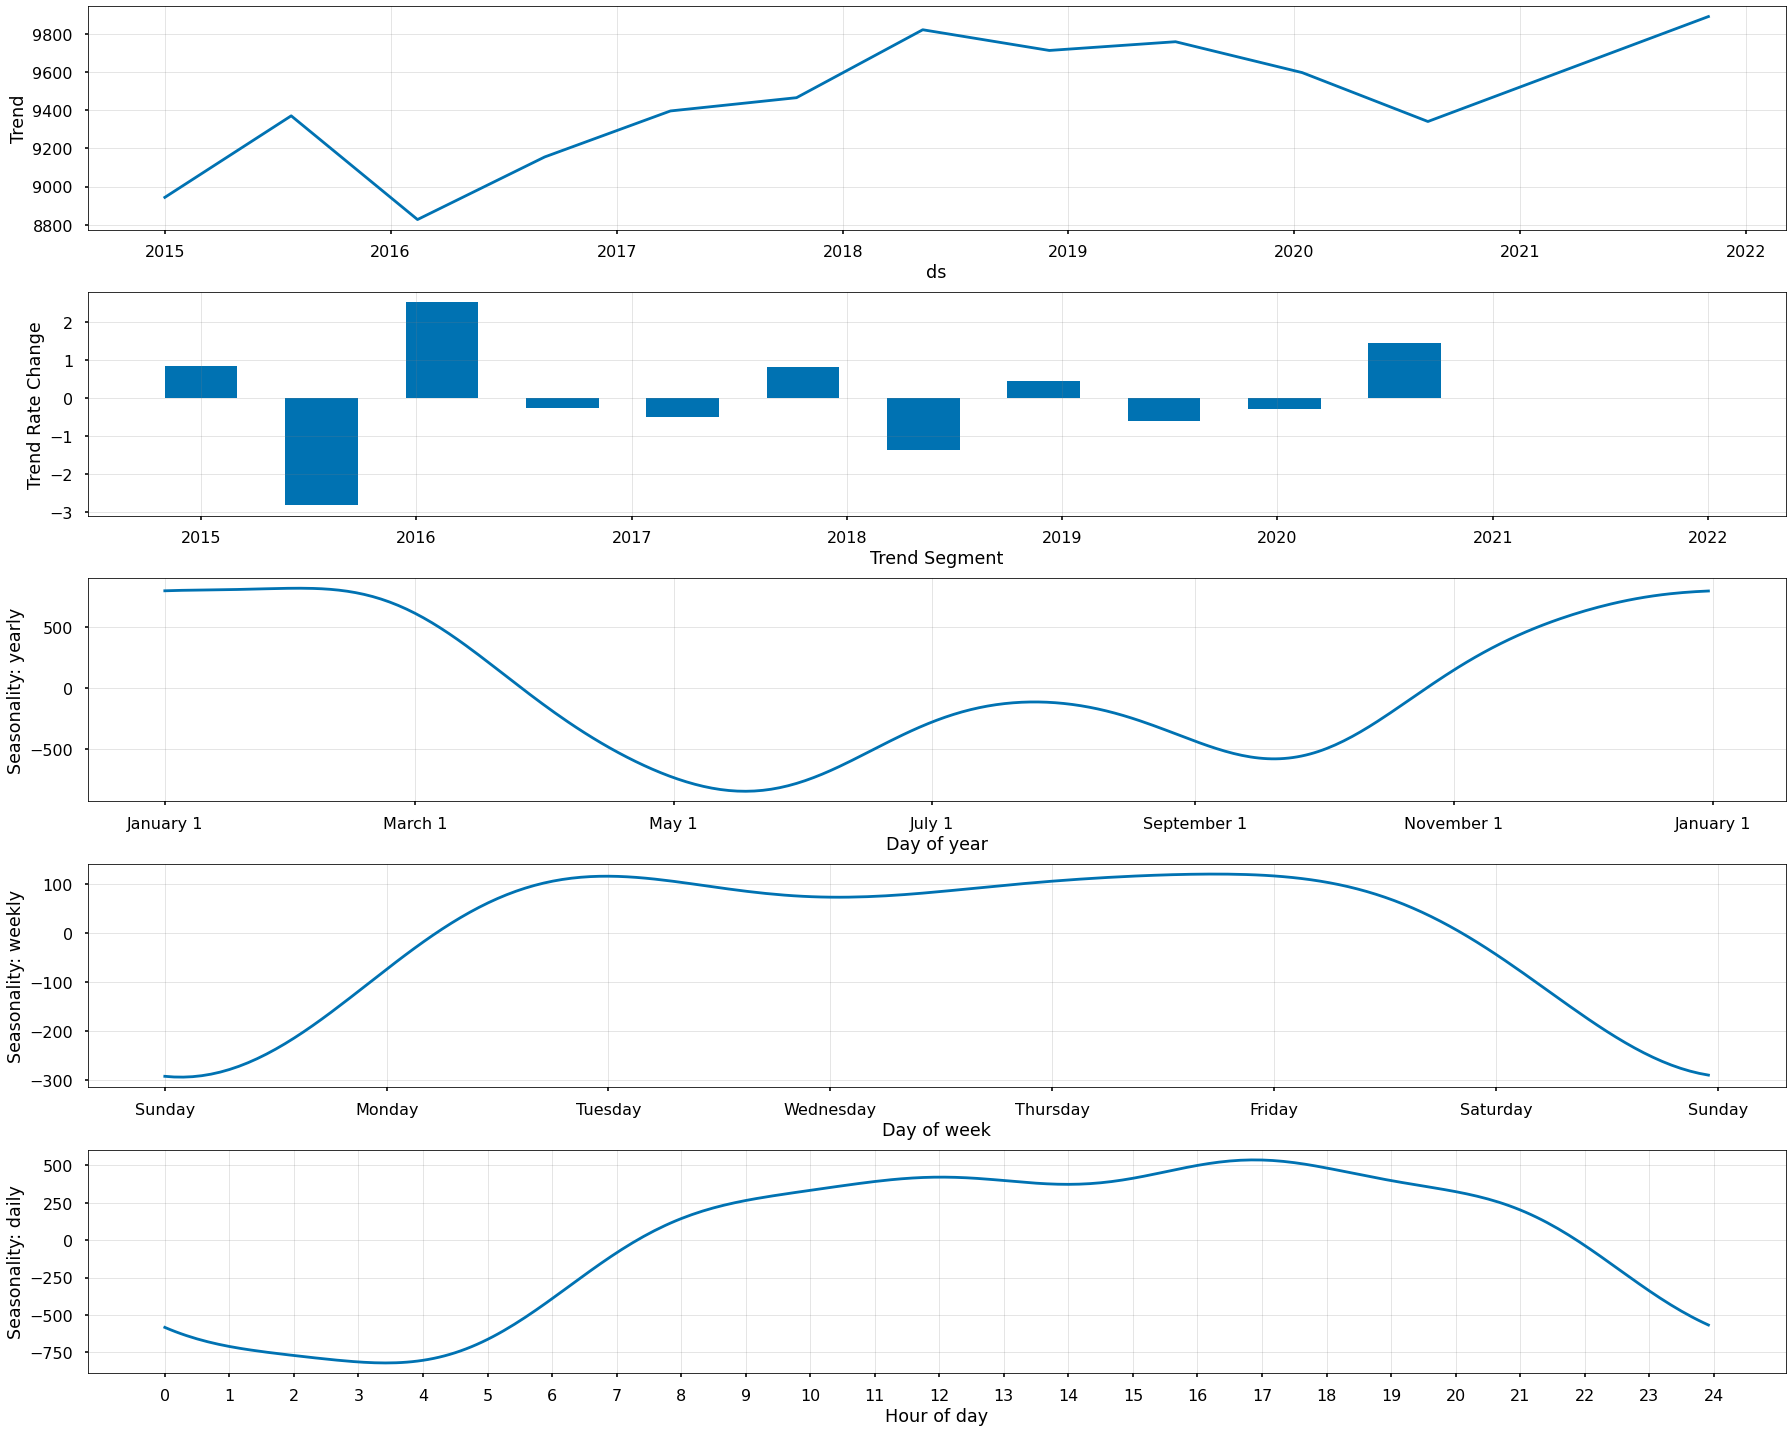

In [76]:
fig_model = m.plot_parameters(figsize=(25, 20))

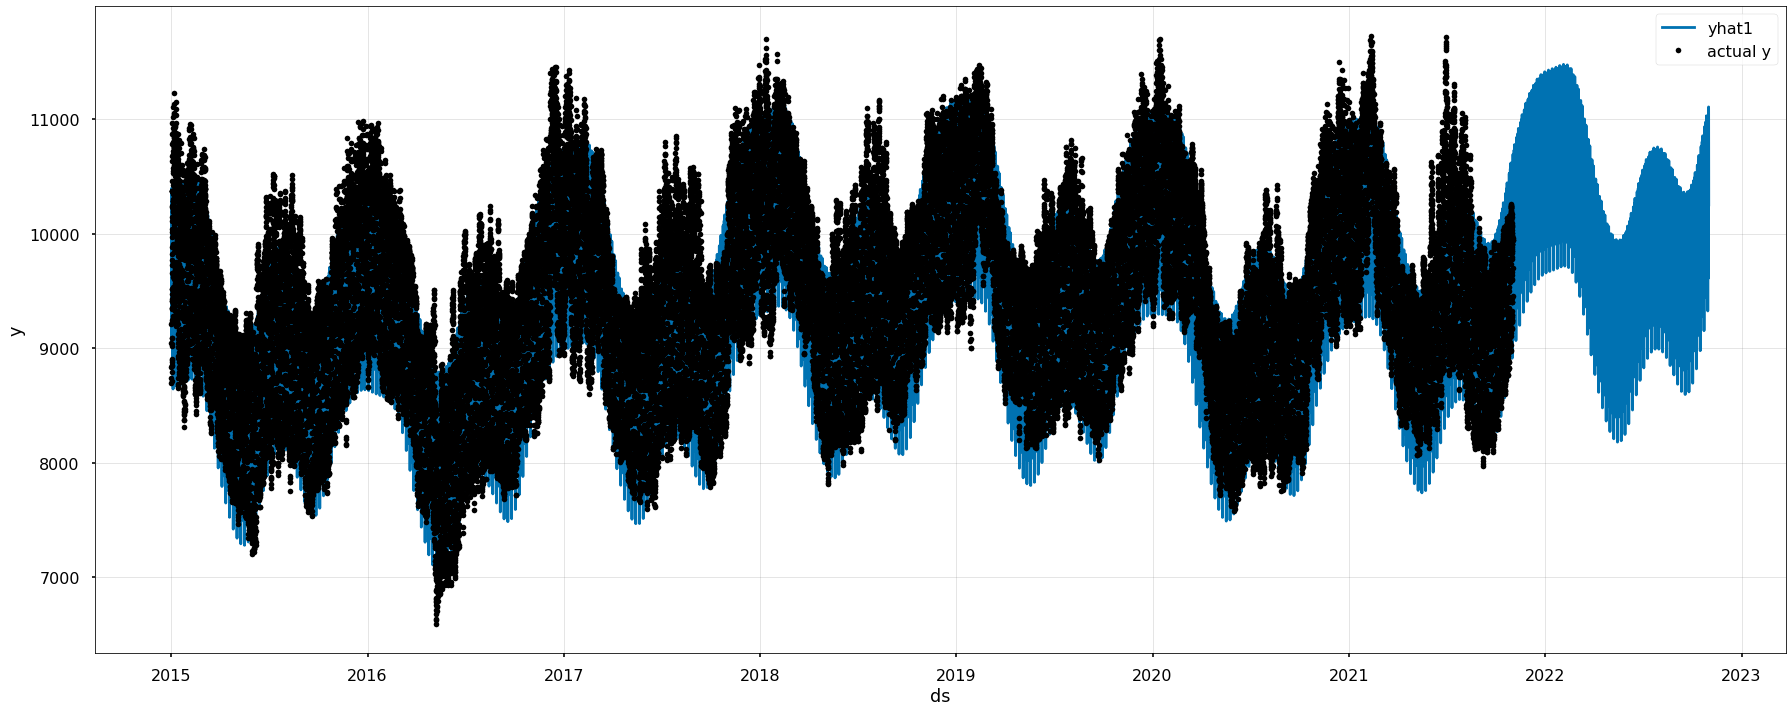

In [90]:
future = m.make_future_dataframe(df, periods=8760, n_historic_predictions=True)
forecast = m.predict(future)
m.plot(forecast,figsize=(25, 10))
plt.show()